# Análisis descriptivo de variables sociodemográficas y nivel de satisfacción de turistas con el Servicio de Atención e Información Turística de Madrid (2023).

### Autores: Nicolás Muñoz / XXX / XXX / XXX
### Fecha: 14/12/2025

In [5]:
pip install pandas

  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ----- ---------------------------------- 1.6/11.0 MB 8.5 MB/s eta 0:00:02
   --------------- ------------------------ 4.2/11.0 MB 10.2 MB/s eta 0:00:01
   ---------------------- ----------------- 6.3/11.0 MB 10.3 MB/s eta 0:00:01
   ------------------------------- -------- 8.7/11.0 MB 10.7 MB/s eta 0:00:01
   ---------------------------------------  10.7/11.0 MB 10.7 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 10.5 MB/s  0:00:01
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ------- -------------------------------- 2.4/12.8 MB 12.3 MB/s eta 0:00:01
   --------------- ------------------------ 5.0/12.8 MB 12.5 MB/s eta 0:00:01
   ----------------------- ---------------- 7.6/12.8 MB 12.3 MB/s eta 0:00:01
   -------------------------------- ------- 10.2/12.8 MB 12.1 MB/s eta 0:00:01
   -------------

In [6]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --------- ------------------------------ 1.8/8.1 MB 9.7 MB/s eta 0:00:01
   -------------------- ------------------- 4.2/8.1 MB 10.3 MB/s eta 0:00:01
   --------------------------------- ------ 6.8/8.1 MB 10.8 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 10.3 MB/s  0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 11.0 MB/s  0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ------------- -------------------------- 2.4/7.0 MB 12.2 MB/s eta 0:00:01
   ----------------------------- ---------- 5.2/7.0 MB 12.4 MB/s eta 0:00:01
   ---------------------------------------- 7.0/7.0 MB 11.2 MB/s  0:00:00
Usin

In [8]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # opcional, solo para el heatmap

In [13]:
# -------------------------------------------------------------------
# 1. Carga de datos
# -------------------------------------------------------------------

df = pd.read_csv("EstudioAtencionVisitante2023.csv", sep=";")
df.head()


,Time End,Sexo,País,"En caso de ser Español, ¿cuál es su provincia de procedencia?",Con quién viaja (sólo una opción),Duración de la estancia en Madrid,Con quién viaja (sólo una opción) - Observaciones,Número de informadores turísticos que están atendiendo,¿Ha buscado información sobre la ciudad de Madrid antes de venir? ¿A través de qué medio? - Observaciones,Oferta de idiomas,...,¿Cómo ha localizado los SAIT? - Observaciones,¿Cuál es el motivo de su visita a la Ciudad de Madrid?,Claridad del lenguaje utilizado,Adecuación de los folletos a la información solicitada,Distribución del espacio (sólo Centros de Turismo,Satisfacción con el Horario de atención al público,¿Qué instalaciones del Servicio de Atención e Información Turística ha visitado? (Seleccione todas las opciones que correspondan),¿ En qué medio de transporte ha llegado a Madrid?,"Aspecto del personal de atención (vestimenta, aseo, identificación)",Señalización informativa
0,13/03/2023,Mujer,Francia,NaN,En pareja,3 noches,NaN,10,web esmadrid.com,10,...,esmadrid.com,"Ocio, recreo y vacaciones",8.0,10,5,10,Centro de Turismo de la Plaza Mayor,Avión,NS/NC,5
1,13/03/2023,Hombre,Irlanda,NaN,Sólo,De 4 a 7 noches,NaN,10,instagram,10,...,NaN,"Ocio, recreo y vacaciones",10.0,10,8,10,PIT del Aeropuerto T-4,Avión,10,8
2,13/03/2023,Mujer,Francia,NaN,En pareja,3 noches,NaN,5,www.tripadvisor.com,8,...,NaN,Cultura,9.0,1,7,10,Centro de Turismo de la Plaza Mayor,Avión,6,5
3,13/03/2023,Mujer,Estados Unidos,NaN,Sólo,Excursionista,NaN,10,NaN,10,...,NaN,Negocios,10.0,10,10,10,Centro de Turismo de la Plaza Mayor,Avión,4,10
4,13/03/2023,Mujer,Argentina,NaN,En pareja,De 3 meses a 1 año,NaN,NS/NC,blogs varios,NS/NC,...,le informaron en PIT Bernabéu,"Ocio, recreo y vacaciones",10.0,NS/NC,10,9,PIT de Estadio Santiago Bernabéu,Avión,NS/NC,10


In [14]:
# -------------------------------------------------------------------
# 2. Selección y limpieza de variables
# -------------------------------------------------------------------

# Renombramos algunas columnas largas para trabajar más cómodo (opcional)
df = df.rename(columns={
    "¿Cuál es su nivel global de satisfacción con el Servicio de Atención e Información Turística?":
        "Satisfaccion_global",
    "Con quién viaja (sólo una opción)": "Con_quien_viaja",
    "Duración de la estancia en Madrid": "Duracion_estancia",
    "¿ En qué medio de transporte ha llegado a Madrid?": "Medio_transporte",
    "Trato y amabilidad": "Trato_amabilidad",
    "Conocimiento del idioma utilizado por parte del personal": "Conocimiento_idioma",
    "Satisfacción con la información facilitada": "Satisf_info",
    "Utilidad de la información facilitada": "Utilidad_info",
    "Tiempo de espera para ser atendido": "Tiempo_espera",
    "Orden y limpieza": "Orden_limpieza",
    "Localización de las instalaciones": "Localizacion_instalaciones"
})

# Creamos variable de nacionalidad en función del país
df["Nacionalidad"] = np.where(
    df["País"].astype(str).str.strip().str.lower() == "españa",
    "Español",
    "Extranjero"
)

# Lista de columnas numéricas de satisfacción / servicio
cols_numericas = [
    "Satisfaccion_global",
    "Trato_amabilidad",
    "Conocimiento_idioma",
    "Satisf_info",
    "Utilidad_info",
    "Tiempo_espera",
    "Orden_limpieza",
    "Localizacion_instalaciones"
]

# Convertimos a numérico, forzando errores a NaN (por ejemplo, "NS/NC")
for col in cols_numericas:
    df[col] = pd.to_numeric(df[col], errors="coerce")

In [15]:
# -------------------------------------------------------------------
# 3. Estadísticos descriptivos básicos
# -------------------------------------------------------------------

desc_satisf_global = df["Satisfaccion_global"].describe()
print("=== Satisfacción global (descriptivos) ===")
print(desc_satisf_global)
print()


=== Satisfacción global (descriptivos) ===
count    1333.000000
mean        9.426857
std         0.765294
min         5.000000
25%         9.000000
50%        10.000000
75%        10.000000
max        10.000000
Name: Satisfaccion_global, dtype: float64



In [16]:
# -------------------------------------------------------------------
# 4. Modelo 1: Satisfacción global por variables sociodemográficas
# -------------------------------------------------------------------

def resumen_por_grupo(df, columna_grupo, columna_respuesta="Satisfaccion_global"):
    """
    Calcula count, mean y std de la columna_respuesta por columna_grupo.
    """
    tabla = df.groupby(columna_grupo)[columna_respuesta].agg(["count", "mean", "std"])
    return tabla

print("=== Satisfacción global por Sexo ===")
tabla_sexo = resumen_por_grupo(df, "Sexo")
print(tabla_sexo)
print()

print("=== Satisfacción global por Edad ===")
tabla_edad = resumen_por_grupo(df, "Edad")
print(tabla_edad)
print()

print("=== Satisfacción global por Nacionalidad ===")
tabla_nacionalidad = resumen_por_grupo(df, "Nacionalidad")
print(tabla_nacionalidad)
print()

print("=== Satisfacción global por tipo de viaje (Con_quien_viaja) ===")
tabla_viaje = resumen_por_grupo(df, "Con_quien_viaja")
print(tabla_viaje)
print()

=== Satisfacción global por Sexo ===
        count      mean       std
Sexo                             
Hombre    522  9.408046  0.727953
Mujer     811  9.438964  0.788598

=== Satisfacción global por Edad ===
       count      mean       std
Edad                            
+65      254  9.448819  0.873036
15-24     68  9.544118  0.781002
25-44    482  9.452282  0.717182
45-64    529  9.378072  0.749224

=== Satisfacción global por Nacionalidad ===
              count      mean       std
Nacionalidad                           
Español         790  9.432911  0.771764
Extranjero      543  9.418048  0.756403

=== Satisfacción global por tipo de viaje (Con_quien_viaja) ===
                        count      mean       std
Con_quien_viaja                                  
Con amigos                164  9.469512  0.659278
En familia                212  9.495283  0.691846
En pareja                 507  9.384615  0.782718
Grupo Organizado           12  9.500000  0.674200
Otras formas (Indica

In [17]:
# -------------------------------------------------------------------
# 5. Modelo 2: Correlaciones entre dimensiones del servicio y satisfacción global
# -------------------------------------------------------------------

corr = df[cols_numericas].corr()

print("=== Matriz de correlaciones ===")
print(corr)
print()

# Extra: ordenamos las correlaciones con la satisfacción global
corr_con_global = corr["Satisfaccion_global"].sort_values(ascending=False)
print("=== Correlación con Satisfacción global (ordenada) ===")
print(corr_con_global)
print()

=== Matriz de correlaciones ===
                            Satisfaccion_global  Trato_amabilidad  \
Satisfaccion_global                    1.000000          0.360945   
Trato_amabilidad                       0.360945          1.000000   
Conocimiento_idioma                    0.385510          0.700703   
Satisf_info                            0.428027          0.631525   
Utilidad_info                          0.432794          0.602014   
Tiempo_espera                          0.348564          0.196246   
Orden_limpieza                         0.333604          0.245151   
Localizacion_instalaciones             0.322444          0.306816   

                            Conocimiento_idioma  Satisf_info  Utilidad_info  \
Satisfaccion_global                    0.385510     0.428027       0.432794   
Trato_amabilidad                       0.700703     0.631525       0.602014   
Conocimiento_idioma                    1.000000     0.721623       0.677841   
Satisf_info                   

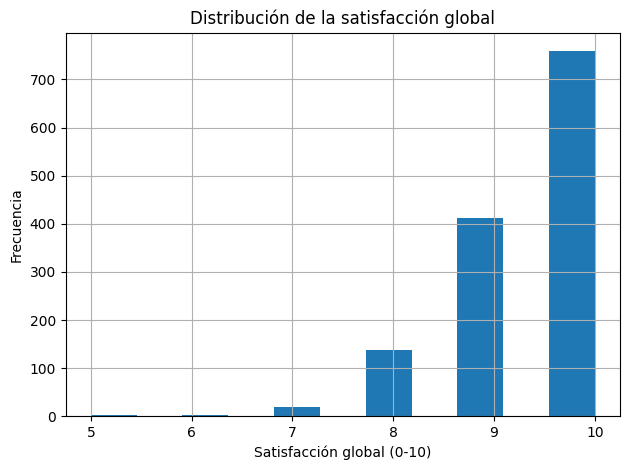

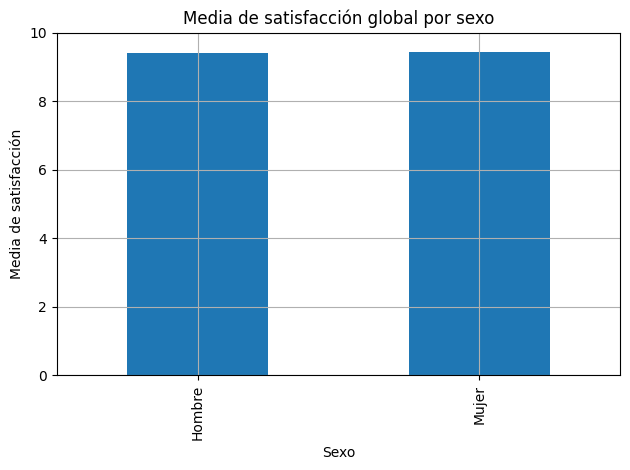

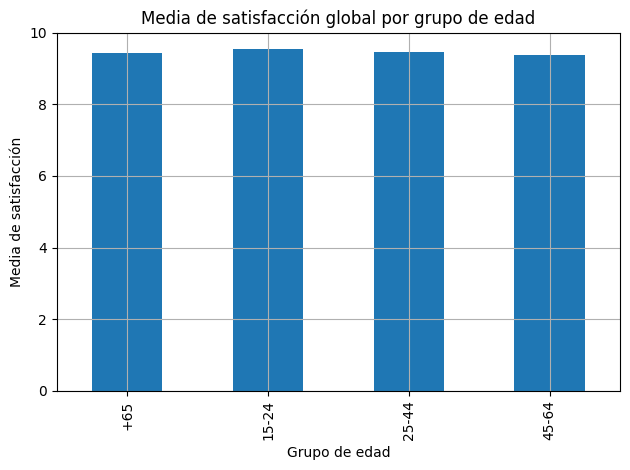

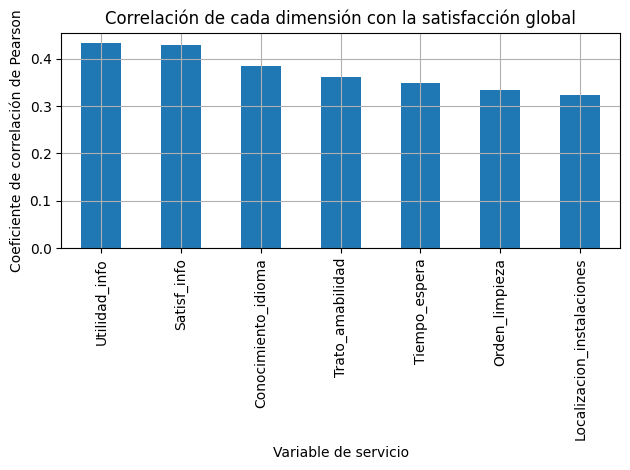

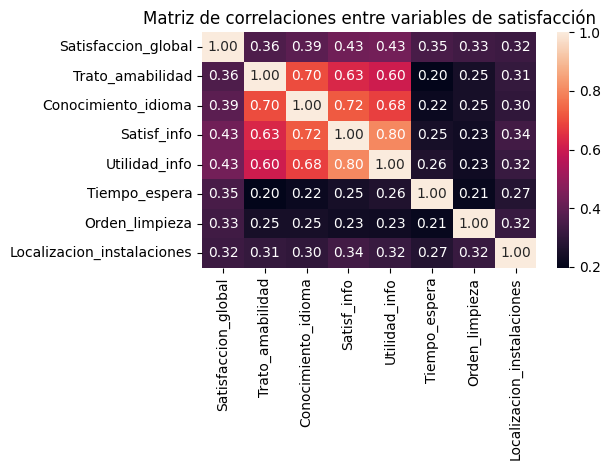

In [18]:
# -------------------------------------------------------------------
# 6. Gráficos
# -------------------------------------------------------------------

# (a) Histograma de satisfacción global
plt.figure()
df["Satisfaccion_global"].plot(kind="hist", bins=11)
plt.title("Distribución de la satisfacción global")
plt.xlabel("Satisfacción global (0-10)")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.tight_layout()
plt.show()

# (b) Media de satisfacción por sexo
plt.figure()
tabla_sexo["mean"].plot(kind="bar")
plt.title("Media de satisfacción global por sexo")
plt.xlabel("Sexo")
plt.ylabel("Media de satisfacción")
plt.ylim(0, 10)
plt.grid(True)
plt.tight_layout()
plt.show()

# (c) Media de satisfacción por edad
plt.figure()
tabla_edad["mean"].plot(kind="bar")
plt.title("Media de satisfacción global por grupo de edad")
plt.xlabel("Grupo de edad")
plt.ylabel("Media de satisfacción")
plt.ylim(0, 10)
plt.grid(True)
plt.tight_layout()
plt.show()

# (d) Correlación con satisfacción global (gráfico de barras)
plt.figure()
corr_con_global.drop("Satisfaccion_global").plot(kind="bar")
plt.title("Correlación de cada dimensión con la satisfacción global")
plt.xlabel("Variable de servicio")
plt.ylabel("Coeficiente de correlación de Pearson")
plt.grid(True)
plt.tight_layout()
plt.show()

# (e) (Opcional) Mapa de calor de la matriz de correlación
plt.figure()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Matriz de correlaciones entre variables de satisfacción")
plt.tight_layout()
plt.show()